In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [28]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
df = pd.read_excel("Cleaned UHS Data.xlsx")
pd.set_option('display.max_columns', None)

In [5]:
df.isnull().sum()

Age                                                          0
ZIP                                                          0
PackYrs                                                  12335
QuitYrs                                                  12756
LungCancerHistory                                            0
TobaccoUse_Every Day                                         0
TobaccoUse_Former                                            0
TobaccoUse_Heavy Smoker                                      0
TobaccoUse_Light Smoker                                      0
TobaccoUse_Smoker, Current Status Unknown                    0
TobaccoUse_Some Days                                         0
Sex_Female                                                   0
Sex_Male                                                     0
Race_African                                                 0
Race_American Indian or Alaska Native                        0
Race_Asian                                             

In [6]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
                Age           ZIP      PackYrs      QuitYrs  \
count  20982.000000  20982.000000  8647.000000  8226.000000   
mean      58.645584  14104.565675    23.527630    19.687582   
std        7.150516   2834.385723    23.209338    14.804146   
min       45.030000   3223.000000     0.000000     0.000000   
25%       52.950000  13760.000000     5.865000     6.420000   
50%       58.840000  13815.000000    19.000000    17.420000   
75%       64.257500  13901.000000    36.000000    31.420000   
max       72.030000  98512.000000   300.000000    64.420000   

       LungCancerHistory  TobaccoUse_Every Day  TobaccoUse_Former  \
count       20982.000000          20982.000000       20982.000000   
mean            0.008722              0.309456           0.622963   
std             0.092984              0.462280           0.484656   
min             0.000000              0.000000           0.000000   
25%             0.000000              0.000000           0.0000

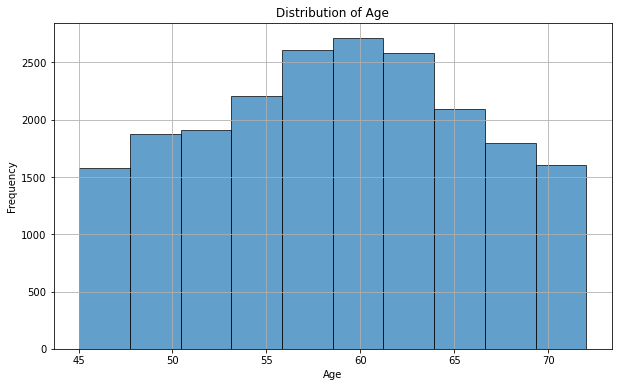

In [7]:
# Distribution of Age
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

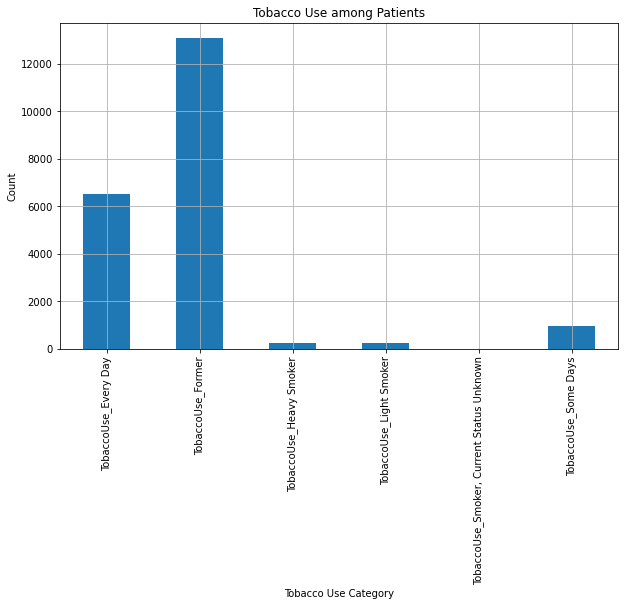

In [8]:
# Tobacco Use Analysis
tobacco_columns = [
    'TobaccoUse_Every Day', 'TobaccoUse_Former', 'TobaccoUse_Heavy Smoker',
    'TobaccoUse_Light Smoker', 'TobaccoUse_Smoker, Current Status Unknown',
    'TobaccoUse_Some Days'
]
tobacco_use_summary = df[tobacco_columns].sum()
tobacco_use_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Tobacco Use among Patients')
plt.xlabel('Tobacco Use Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()

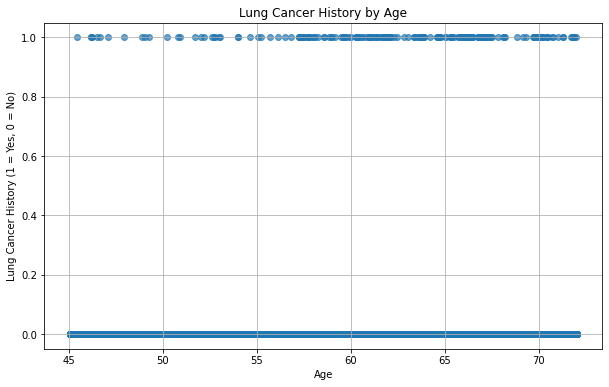

In [9]:
# Lung Cancer History by Age
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['LungCancerHistory'], alpha=0.7)
plt.title('Lung Cancer History by Age')
plt.xlabel('Age')
plt.ylabel('Lung Cancer History (1 = Yes, 0 = No)')
plt.grid(True)
plt.show()

In [16]:
# Data Cleaning
df['PackYrs'] = df['PackYrs'].fillna(0)  # Filling missing PackYrs with 0
df = df.fillna(0) 

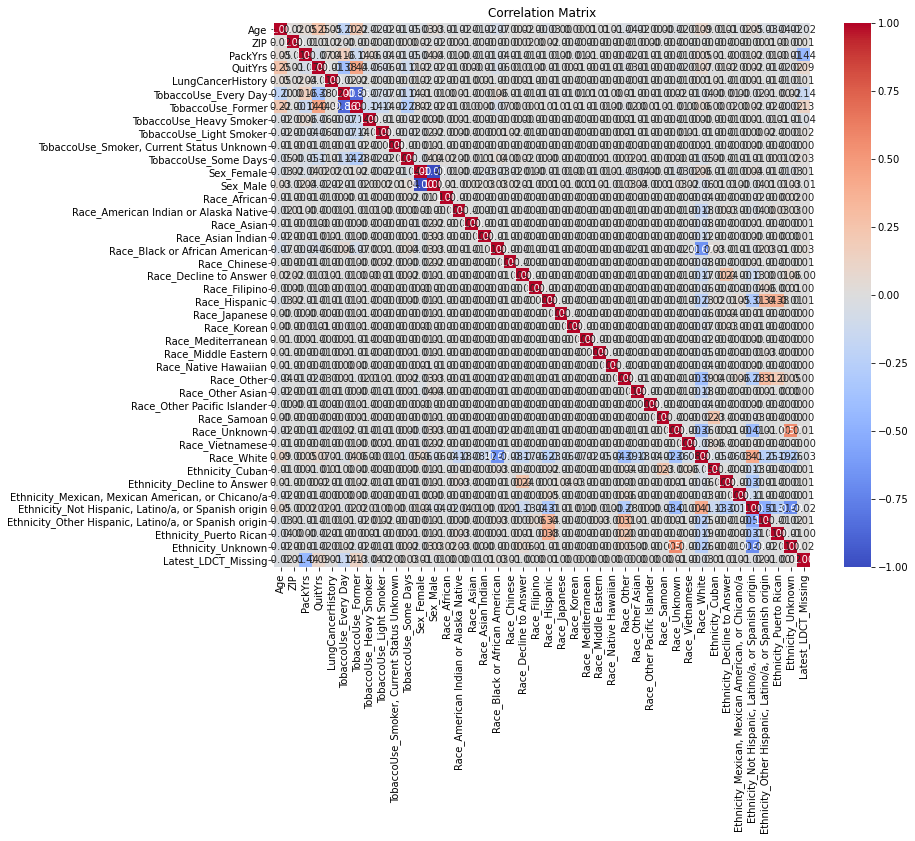

In [17]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [36]:
# Dimensionality Reduction
features = df.drop(columns=['LungCancerHistory'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [37]:
# Applying PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(scaled_features)
print('Explained variance by principal components:', pca.explained_variance_ratio_)

Explained variance by principal components: [0.07143059 0.05745731 0.04877374 0.03928355 0.03704478]


In [38]:
X = df.drop(columns=['LungCancerHistory'])
y = df['LungCancerHistory']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

In [39]:
# Remove zero-variance features
zero_variance_columns = X_train.columns[X_train.var() == 0]
X_train_reduced = X_train.drop(columns=zero_variance_columns)
X_test_reduced = X_test.drop(columns=zero_variance_columns)

In [40]:
# Check for multicollinearity using VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Feature"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

X_train_sm = sm.add_constant(X_train_reduced)
vif = calculate_vif(X_train_sm.drop(columns=['const']))
print(vif)

# Assuming columns with VIF > 10 are highly collinear
features_to_remove = vif[vif["VIF"] > 10]["Feature"].tolist()
X_train_reduced = X_train_reduced.drop(columns=features_to_remove)
X_test_reduced = X_test_reduced.drop(columns=features_to_remove)

# Recalculate VIF after removing these features
X_train_sm_reduced = sm.add_constant(X_train_reduced)
vif_reduced = calculate_vif(X_train_sm_reduced.drop(columns=['const']))
print(vif_reduced)

C:\Users\jonl8\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                              Feature         VIF
0                                                 Age    1.106481
1                                                 ZIP    1.002732
2                                             PackYrs    1.257427
3                                             QuitYrs    1.288935
4                                TobaccoUse_Every Day         inf
5                                   TobaccoUse_Former         inf
6                             TobaccoUse_Heavy Smoker         inf
7                             TobaccoUse_Light Smoker         inf
8           TobaccoUse_Smoker, Current Status Unknown         inf
9                                TobaccoUse_Some Days         inf
10                                         Sex_Female         inf
11                                           Sex_Male         inf
12                                       Race_African    1.335515
13              Race_American Indian or Alaska Native   16.018049
14        

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

In [42]:
log_reg = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

In [43]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6246
           1       0.00      0.00      0.00        49

    accuracy                           0.99      6295
   macro avg       0.50      0.50      0.50      6295
weighted avg       0.98      0.99      0.99      6295



C:\Users\jonl8\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonl8\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonl8\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[6246    0]
 [  49    0]]


In [45]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.6456834414841824


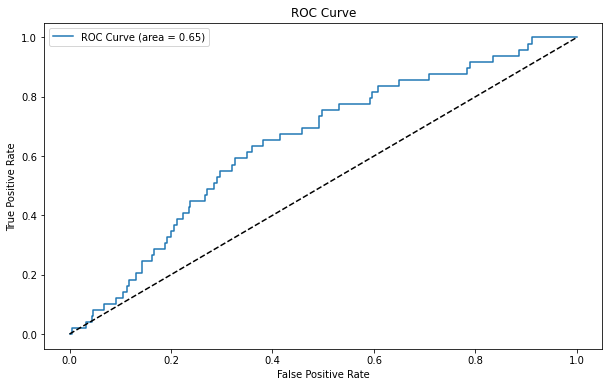

In [46]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [47]:
coefficients = pd.DataFrame({'Feature': X_train_reduced.columns, 'Coefficient': log_reg.coef_[0]})
significant_factors = coefficients[np.abs(coefficients['Coefficient']) > 0.1]  # Adjust threshold as needed
print("Significant factors:")
print(significant_factors)

Significant factors:
                Feature  Coefficient
0                   Age     0.507687
2               PackYrs     0.302948
3               QuitYrs    -0.285560
18  Latest_LDCT_Missing     0.194318
